# Project background and objectives

In this project, I am taking on the role of a social media analyst responsible for collecting, cleaning, and analysing data on a client's social media posts. My job is to use this analysis to communicate insights and make data-driven recommendations to help my client optimise their social media strategy and increase their reach and engagement.  


In [1]:
# Import the necessary libraries

import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns


I am supposing that I've been asked to collect data relating to the number of likes on Facebook posts across different categories.

As this is a hypothetical client and I have no real data to work with, I need to generate some random data for the social media data I will be exploring and analysing later in the project. The data will consist of three features:

1. Date 
1. Category
1. Number of likes


## Generating the data

In [2]:
# Here I define a list of categories

categories = ['Travel', 'Sport', 'Music', 'Family', 'Health', 'Film', 'Fashion', 'Food', 'Books', 'Comedy']

In [3]:
# Create data dictionary and populate with random data.

# Define the start and end dates
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-01-01')

# Set the random seed for reproducibility
rng = np.random.default_rng(seed=42)

# Generate 1000 random dates within the range, one for each Facebook post. This method allows for multiple posts occurring on the same day.
num_tweets = 1000
random_dates = start_date + (end_date - start_date) * rng.random(num_tweets)

# Convert the numpy array of random dates to a pandas Series and format as YYYY-MM-DD
random_dates_formatted = pd.Series(random_dates).dt.strftime('%Y-%m-%d')

data = {
    'Date': random_dates_formatted,                                     # 2000 random dates within the given date range
    'Category': rng.choice(categories, size=num_tweets),                # randomly selects a category from the list for each of the 1000 rows
    'Likes': rng.integers(5000, size=num_tweets)                       # for each row, a random integer is selected in the range 0-5000 to represent number of likes
}

In [4]:
# The data can now be viewed and handled in a pandas dataframe

df = pd.DataFrame(data)

## Exploring the data

In [5]:
# Look at the first few rows of the dataframe

df.head()

,Date,Category,Likes
0,2023-10-10,Books,3890
1,2023-06-10,Travel,3359
2,2023-11-10,Family,4649
3,2023-09-12,Health,4802
4,2023-02-04,Food,3524


Here we can see the dataframe is made up of three columns. Date and Likes are continuous variables, while Category is, not surprisingly, a categorical variable.

In [6]:
# Print a summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Category  1000 non-null   object
 2   Likes     1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


This summary shows that there are 3 columns and 2000 rows in the dataframe. It shows the datatype of each column and confirms that there are no missing values in any of the columns.

In [7]:
# Summary statistics for numerical columns - in this case, just the Likes column.

df.describe()

,Likes
count,1000.000000
mean,2505.172000
std,1430.058823
min,2.000000
25%,1207.750000
50%,2498.000000
75%,3745.250000
max,4996.000000


In [8]:
# Look at the number of posts belonging to each of the categories

df.Category.value_counts()

Category
Comedy     114
Sport      112
Family     110
Health     108
Food        96
Film        96
Books       95
Fashion     91
Travel      89
Music       89
Name: count, dtype: int64

In [9]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

duplicate_rows.value_counts()

False    1000
Name: count, dtype: int64

## Cleaning the data

We have already established that there are no null values or duplicate rows in the dataset.

I will convert the Date column to datetime format to enable plotting.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.normalize()
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int64
dtype: object

## Visualizing the data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


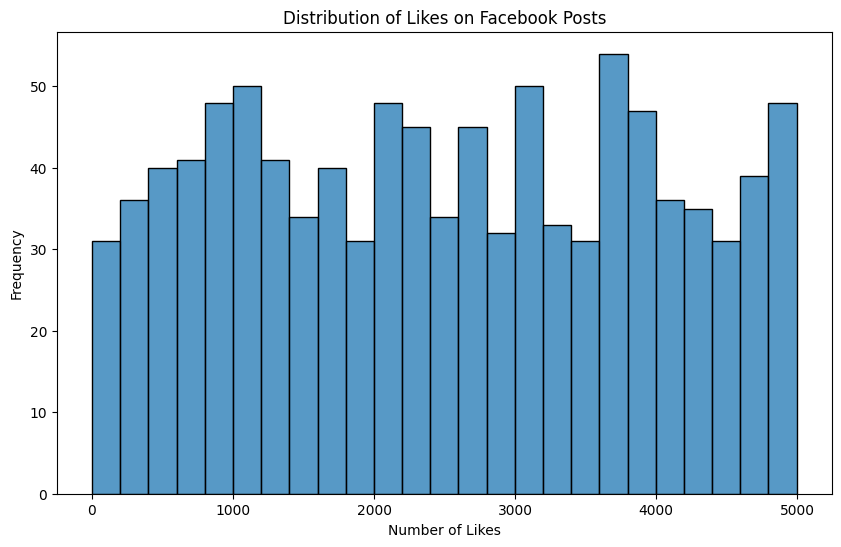

In [11]:
# Histogram of Likes

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Likes', bins=25)     
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes on Facebook Posts')
plt.show()

The histogram shows that the grouping of 3600-3800 likes has the highest frequency, but it's difficult to draw any actionable conclusions from this plot. By defining thresholds for 'Low', 'Medium' and 'High' numbers of Likes, it will be easier to see how much engagement the client generates with its posts. Furthermore, we can subdivide the bars to see how each subject is represented in each likes category. I will set the 33rd percentile as the threshold between low and medium, and the 66th percentile as the threshold between medium and high.

In [12]:
# Calculate percentiles for thresholds
low_threshold = np.percentile(df['Likes'], 33)
high_threshold = np.percentile(df['Likes'], 66)

print(f'Low threshold: {low_threshold}')
print(f'High threshold: {high_threshold}')

Low threshold: 1653.0
High threshold: 3286.0600000000004


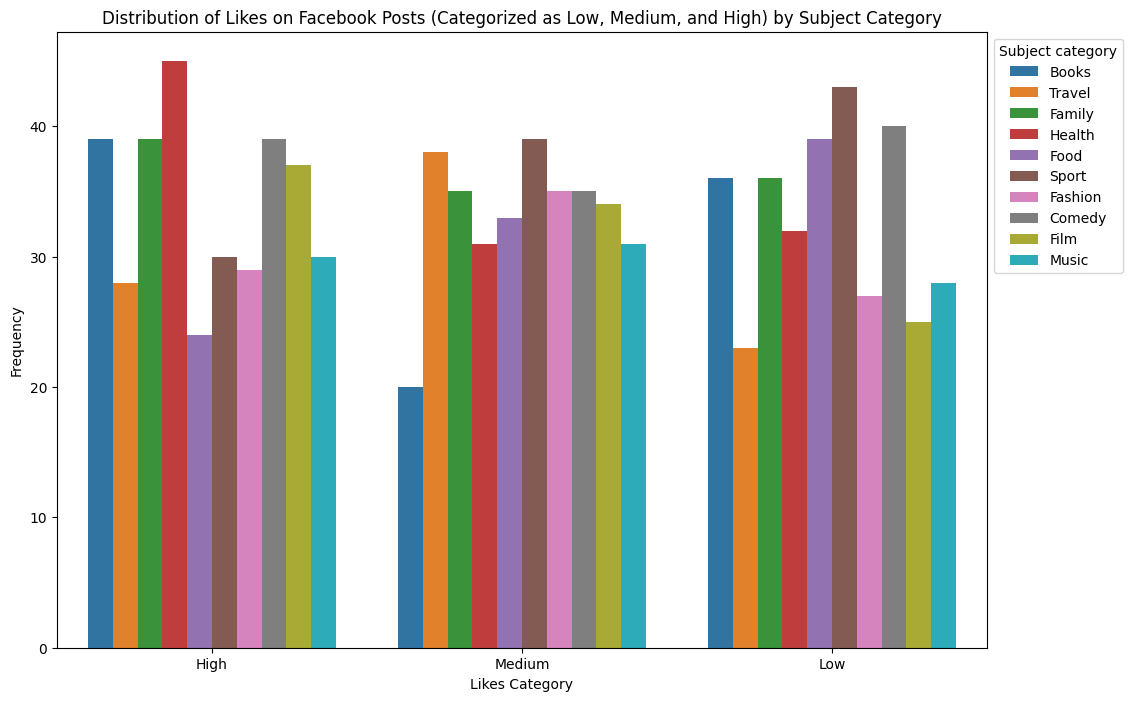

In [13]:
# Categorize likes based on the calculated thresholds
def categorize_likes(likes):
    if likes < low_threshold:
        return 'Low'
    elif likes < high_threshold:
        return 'Medium'
    else:
        return 'High'

df['Likes Category'] = df['Likes'].apply(categorize_likes)

# Plotting the count plot to show distribution of likes categories
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Likes Category', hue='Category')
plt.xlabel('Likes Category')
plt.ylabel('Frequency')
plt.title('Distribution of Likes on Facebook Posts (Categorized as Low, Medium, and High) by Subject Category')
plt.legend(title='Subject category', bbox_to_anchor=(1, 1))
plt.show()

Here we can see that Health generates the most posts in the 'High' likes category, followed by Books, Family, Comedy, and Film.
Most of the posts in the Low likes category relate to Sport, with Comedy and Food also generating a high number of Low likes.

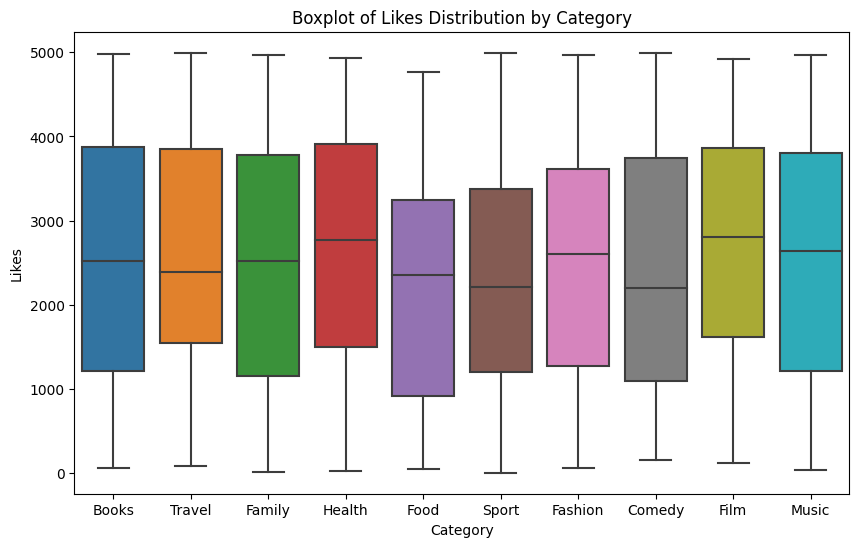

In [14]:
# Boxplot showing the distribution per category

plt.figure(figsize=(10, 6))

sns.boxplot(x="Category",
                y="Likes",
                data=df)


plt.title('Boxplot of Likes Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.grid(False) 
plt.show()


Categories where median below centre of box: Travel, Sport, Comedy
Maybe look at boxplots showing different days of week - do some categories do better on different days?

Statistical analysis: Comparing the mean number of Likes for each category with the overall mean number of Likes for the whole dataset.

In [15]:
df.Likes.mean()

2505.172

In [16]:
groups = df.groupby('Category')
groups.Likes.mean()

Category
Books      2508.294737
Comedy     2430.201754
Family     2512.518182
Fashion    2470.263736
Film       2711.166667
Food       2246.177083
Health     2689.925926
Music      2644.528090
Sport      2298.928571
Travel     2577.640449
Name: Likes, dtype: float64

The average number of Likes in the Comedy, Fashion, Food, and Sport categories is lower than the overall average.
Food has the lowest average number of Likes, and Film has the highest average.

In [17]:
# CONCLUSION
# Write a conclusion about your process and any key findings.
# This is your opportunity to impress your prospective employer with your critical thinking and problemsolving skills. You may want to discuss the process you followed and share your struggles and how you
# overcame them. What do you think sets your portfolio project apart from those of other candidates?
# You may even want to offer ideas for improving the design for future business endeavors.
# At this point, you can prepare the project artifacts for uploading into your portfolio. You should include:
# • An image file of your Graphs and Statistics with the fields and data displayed.
# • Excerpts from your code explaining the purpose of the code.
# • Any improvements/changes you would make to the application.